# Multi-Class Logistic Regression

In simple logistic regression, we try to fit the probability of the response variable’s success against the predictor variable. This predictor variable can be either categorical or continuous. 

 First, run the cell below to import the packages needed in this assignment:

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- `utils.py` contains helper functions for this assignment. You do not need to modify code in this file.

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

In [39]:
data = pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds1_train.csv')
data.info

<bound method DataFrame.info of           x_1         x_2    y
0    2.911809   60.359613  0.0
1    3.774746  344.149284  0.0
2    2.615488  178.222087  0.0
3    2.013694   15.259472  0.0
4    2.757625   66.194174  0.0
..        ...         ...  ...
795  3.724697   23.219963  1.0
796  3.139055    5.970538  1.0
797  2.969095   20.249978  1.0
798  3.957531   27.261970  1.0
799  4.025334   12.233165  1.0

[800 rows x 3 columns]>

In [40]:
data['y'].unique()

array([0., 1.])

In [41]:
testdata=pd.read_csv('C:\\Users\\Adrij\\Documents\\Data Analysis and Machine Learning\\ds1_test.csv')

In [42]:
from sklearn.model_selection import train_test_split
# Divide the training data to dependent and independent variables
X_train, x_test, y_train, Y_test=train_test_split(data[['x_1','x_2']],data['y'],test_size=0.01)

In [43]:
from sklearn.model_selection import train_test_split
# Divide the test data to dependent and independent variables
X_test, x_train, y_test, Y_train=train_test_split(testdata[['x_1','x_2']],testdata['y'],test_size=0.01)

In [44]:
X_train

,x_1,x_2
495,3.590868,23.243940
624,3.808941,41.451079
690,4.484579,24.756973
282,3.176049,150.054447
329,3.928604,78.202515
...,...,...
423,4.375681,67.328320
610,4.209735,39.368114
701,2.276453,5.160314
81,3.172511,214.418893


In [45]:
y_train

495    1.0
624    1.0
690    1.0
282    0.0
329    0.0
      ... 
423    1.0
610    1.0
701    1.0
81     0.0
161    0.0
Name: y, Length: 792, dtype: float64

In [46]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=792, solver='lbfgs')
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=792)

In [47]:
mymodel.predict(X_test)

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

In [48]:
X_test

,x_1,x_2
82,4.202404,64.906688
34,4.685805,261.821353
80,2.294092,8.203514
47,2.273019,64.718790
83,4.756387,40.510175
...,...,...
49,3.462259,58.990834
15,1.988027,47.417765
6,6.362292,1419.049105
91,3.533394,31.870461


In [49]:
mymodel.score(X_test, y_test)

0.898989898989899

In [50]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[41,  8],
       [ 2, 48]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

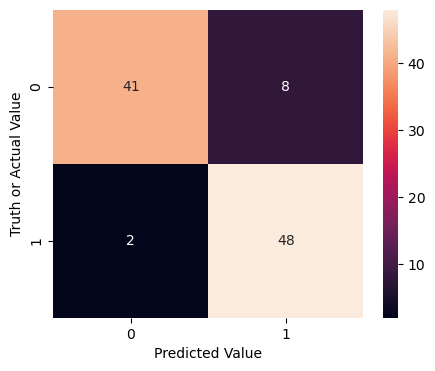

In [52]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [53]:
type(y_train)
y_train.shape

(792,)

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

In [55]:
class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

In [56]:
model = Multiclass()
Y=y_train.to_numpy()
model.fit(X_train, Y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


<Axes: xlabel='step', ylabel='loss'>

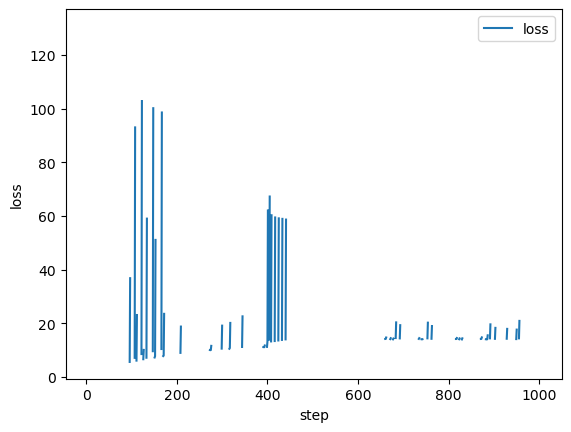

In [57]:
model.loss_plot()

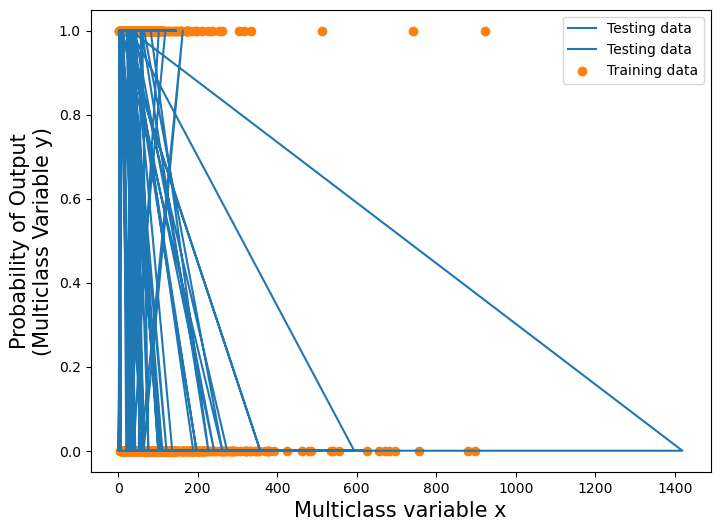

In [58]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.plot(X_test, y_test, c='C0', label='Testing data')
plt.scatter(X_train.values[:,1], y_train, c='C1', label='Training data')
plt.legend()
plt.xlabel("Multiclass variable x", fontsize=15)
plt.ylabel("Probability of Output" '\n' "(Multiclass Variable y)", fontsize=15)
plt.show()

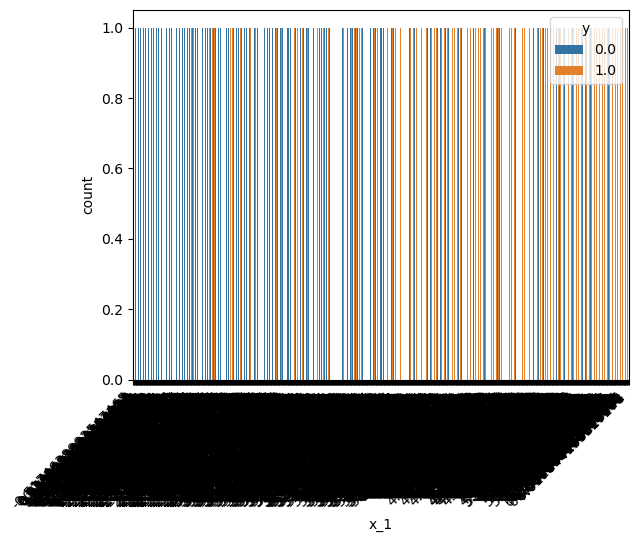

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x=data['x_1'],hue='y')
plt.xticks(rotation=45, ha='right');

In [60]:
pre_data = pd.get_dummies(data,columns=['x_1'],drop_first=True)
pre_data.head()

,x_2,y,x_1_0.275481861254307,x_1_0.6749665624312904,x_1_0.7380234600096016,x_1_0.7889344390406552,x_1_0.9366978835550066,x_1_0.9739224589660608,x_1_1.022852253268184,x_1_1.0335178635149371,...,x_1_6.197509515145471,x_1_6.211818871314001,x_1_6.257112101782843,x_1_6.281655238796001,x_1_6.41146156810825,x_1_6.4681116152351255,x_1_6.593562796244639,x_1_6.607894463975791,x_1_6.762230170226044,x_1_7.017044153327278
0,60.359613,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,344.149284,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,178.222087,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.259472,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,66.194174,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [62]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8282828282828283
F1 Score: 0.8292704180554648


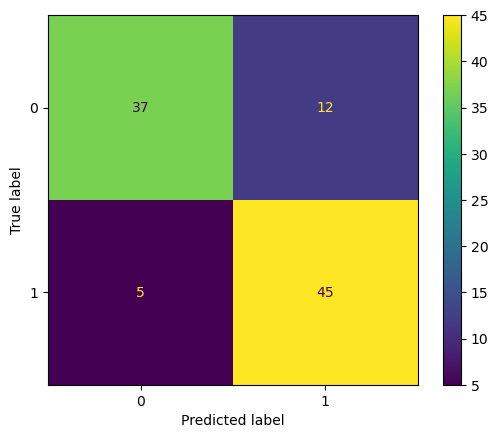

In [63]:
labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression(C=1e100)

In [66]:
X_train.shape

(792, 2)

In [67]:
X_train[:5]

,x_1,x_2
495,3.590868,23.243940
624,3.808941,41.451079
690,4.484579,24.756973
282,3.176049,150.054447
329,3.928604,78.202515


In [68]:
lr = lr.fit(X_train.values[:,1].reshape(-1,1),y_train.ravel())

In [69]:
#FROM Scikit learn
'Theta_0 and Theta_1 are {},{}'.format(round(lr.intercept_[0],3), round(lr.coef_[0,0],3))

'Theta_0 and Theta_1 are 0.872,-0.011'

In [71]:
# define the multinomial logistic regression model with a default penalty
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

LogisticRegression(multi_class='multinomial')

>0.0000 0.879 (0.027)
>0.0001 0.690 (0.057)
>0.0010 0.794 (0.049)
>0.0100 0.887 (0.032)
>0.1000 0.880 (0.026)
>1.0000 0.880 (0.028)


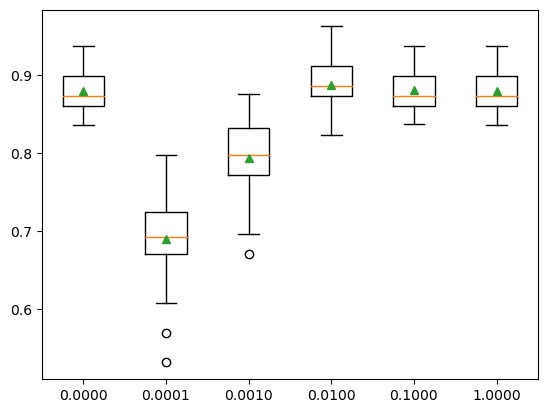

In [72]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [76]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()

In [77]:
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('logistic_Reg', logistic_Reg)])

In [78]:
n_components = list(range(1,X_train.shape[1]+1,1))

In [79]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,logistic_Reg__C=C,logistic_Reg__penalty=penalty)

In [80]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penal

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2]})

In [81]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 3.727593720314938
Best Number Of Components: 2

LogisticRegression(C=3.727593720314938)


In [82]:
LogisticRegression(C=0.3906939937054613, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.3906939937054613, multi_class='warn', solver='warn')

In [83]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_test)/len(y_train):.4f}')

train samples: 792
validation samples: 99
target proportion: 0.0631


# 4. Building the Models

## 4.1 Decision Tree

There are several hyperparameters in the Decision Tree object from Scikit-learn.

The hyperparameters we will use and investigate here are:

 - min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
 - max_depth: The maximum depth of the tree. 
   - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [84]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

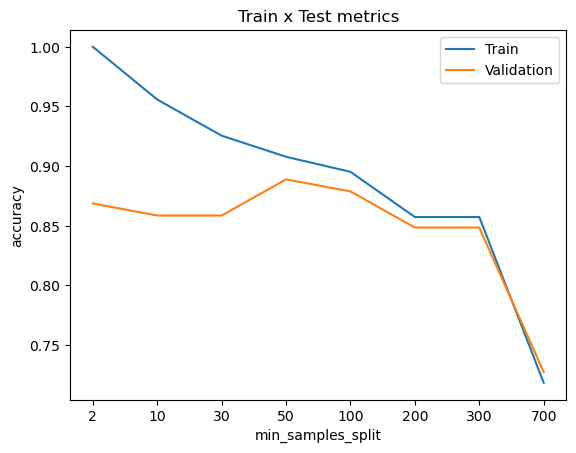

In [85]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
RANDOM_STATE = 28 ## We will pass it to every sklearn call
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

Note how increasing the the number of `min_samples_split` reduces overfitting.
- Increasing `min_samples_split` from 10 to 30, and from 30 to 50, even though it does not improve the validation accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.

Let's do the same experiment with `max_depth`.

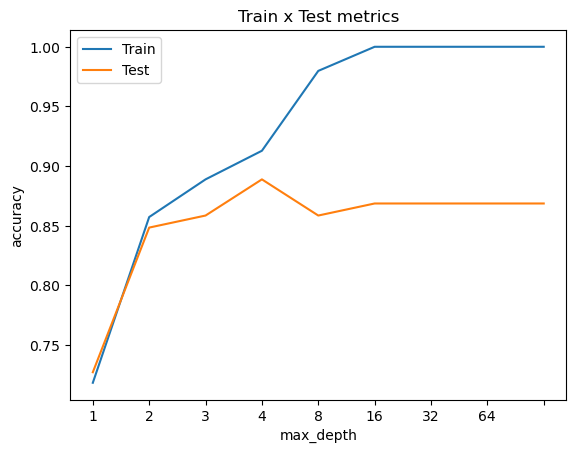

In [86]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

We can see that in general, reducing `max_depth` can help to reduce overfitting.
- Reducing `max_depth` from 16 to 4 increases testing accuracy closer to training accuracy, while significantly reducing training accuracy.
- The test accuracy reaches the highest at tree_depth=4. 
- When the `max_depth` is smaller than 4, both training and test accuracy decreases.  The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set). 
- When the `max_depth` is too high ( >= 5), test accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50` 

In [87]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [88]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9053
Metrics validation:
	Accuracy score: 0.8889


No sign of overfitting, even though the metrics are not that good.

## 4.2 Random Forest

Now let's try the Random Forest algorithm also, using the Scikit-learn implementation. 
- All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
- One additional hyperparameter for Random Forest is called `n_estimators` which is the number of Decision Trees that make up the Random Forest. 

For a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.
- Following the lectures, if $n$ is the number of features, we will randomly select $\sqrt{n}$ of these features to train each individual tree. 
- Note that we can modify this by setting the `max_features` parameter.

We can also speed up your training jobs with another parameter, `n_jobs`. 

We will run the same script again, but with another parameter, `n_estimators`, where we will choose between 10, 50, and 100. The default is 100.

In [89]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

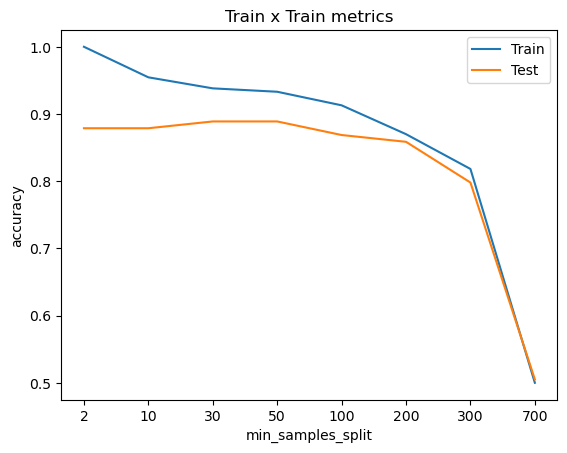

In [90]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Train metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

Notice that, even though the test accuracy increases from `min_samples_split = 2` and `min_samples_split = 30`, in the latter the difference in training and test set reduces, showing less overfitting.

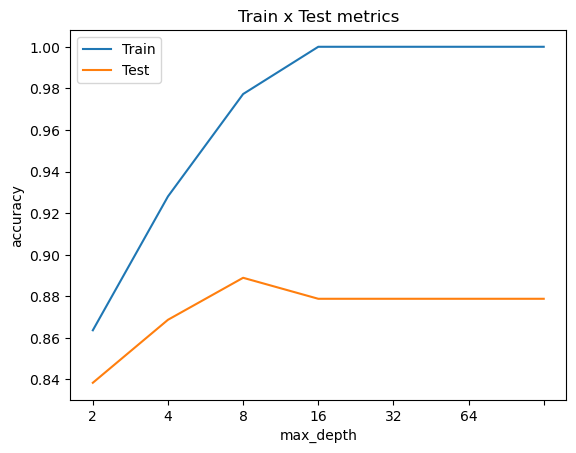

In [91]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

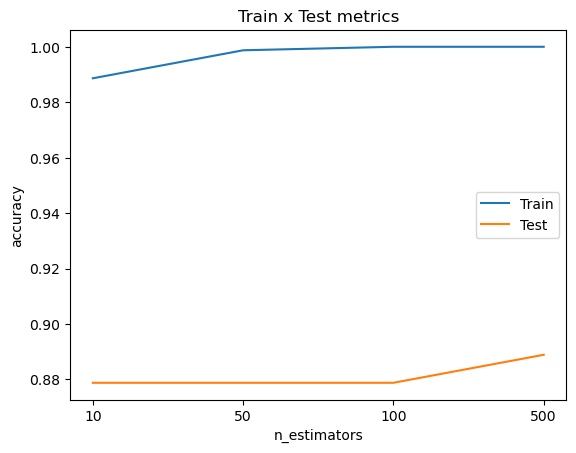

In [92]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

Let's then fit a random forest with the following parameters:

 - max_depth: 8
 - min_samples_split: 30
 - n_estimators: 50

In [93]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 8, 
                                             min_samples_split = 30).fit(X_train,y_train)

In [94]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9306
Metrics test:
	Accuracy score: 0.8990


In [95]:
# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81        49
         1.0       0.79      0.90      0.84        50

    accuracy                           0.83        99
   macro avg       0.84      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99

Overall Precision: 0.7894736842105263
Overall Recall: 0.9
[[1.00708966e-01 8.99291034e-01]
 [9.22136726e-01 7.78632737e-02]
 [6.92248733e-01 3.07751267e-01]
 [9.26943747e-01 7.30562525e-02]
 [1.37402537e-02 9.86259746e-01]
 [3.49140730e-01 6.50859270e-01]
 [9.97671784e-01 2.32821588e-03]
 [8.70646477e-01 1.29353523e-01]
 [9.99998689e-01 1.31061722e-06]
 [8.19663032e-01 1.80336968e-01]]


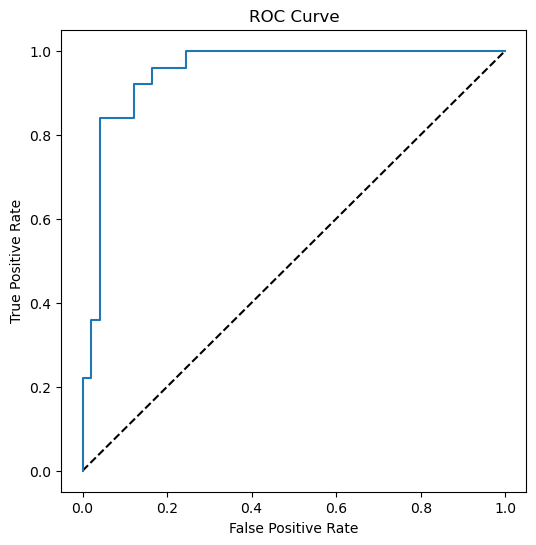

In [96]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
y_scores = model.predict_proba(X_test)
print(y_scores[:10])
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.